<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>1. Набор данных диабета </h2>

In [27]:
import mglearn
import numpy as np
import mglearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Keys of diabetes(): \n{}".format(diabetes.keys()))

Keys of diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [18]:
print("Shape of the array data for diabetes dataset: {}".format(diabetes.data.shape))

Shape of the array data for diabetes dataset: (442, 10)


In [19]:
print("Name of the features:\n{}".format(diabetes.feature_names))

Name of the features:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
print(diabetes['DESCR']+"\n...")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [21]:
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_data.head(15)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


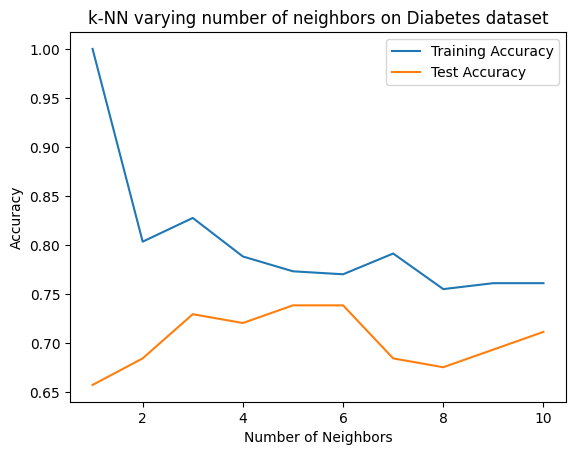

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

target_class = (diabetes.target > 140).astype(int)

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, target_class, stratify=target_class, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()
plt.title("k-NN varying number of neighbors on Diabetes dataset")
plt.show()


In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [76]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))

Prediction on the test set: [0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1]


In [78]:
print("Correctness on the test set: {:.2f}".format(clf.score(X_test,y_test)))

Correctness on the test set: 0.73


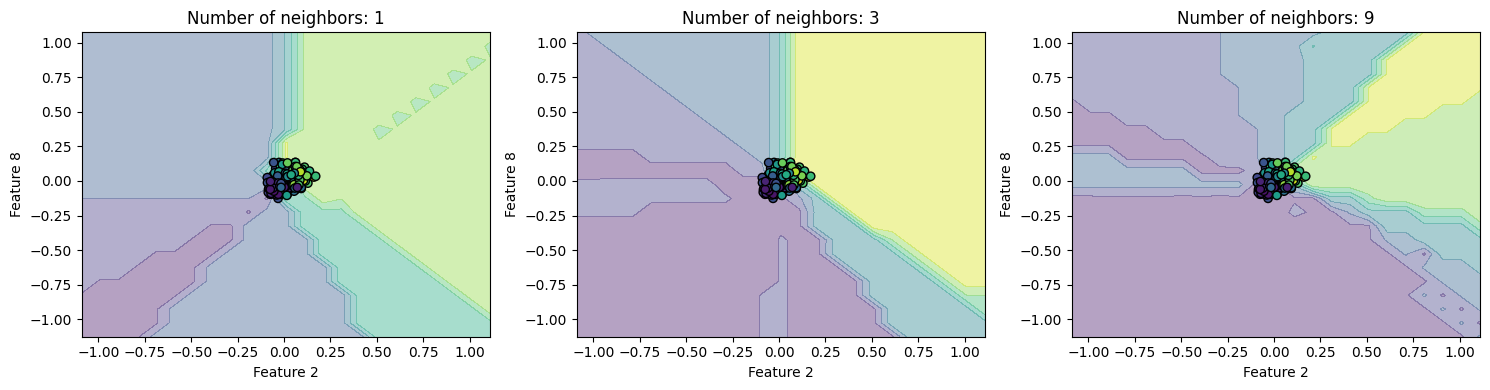

In [79]:
from sklearn.neighbors import KNeighborsClassifier

X, y = diabetes.data, diabetes.target

# Choose two features for visualization
feature_1 = 2  # Change these indices to visualize different features
feature_2 = 8  # Change these indices to visualize different features

X_sub = X[:, [feature_1, feature_2]]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_sub, y)
    
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_sub[:, 0], X_sub[:, 1], c=y, edgecolor='k')
    
    ax.set_title("Number of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Feature {}".format(feature_1))
    ax.set_ylabel("Feature {}".format(feature_2))

plt.tight_layout()
plt.show()


In [102]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,random_state=0)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [103]:
print("Predictions for the test set: \n{}".format(knn_regressor.predict(X_test)))

Predictions for the test set: 
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.333333

In [104]:
print("R^2 on the test set: {:.2f}".format(knn_regressor.score(X_test,y_test)))

R^2 on the test set: 0.15


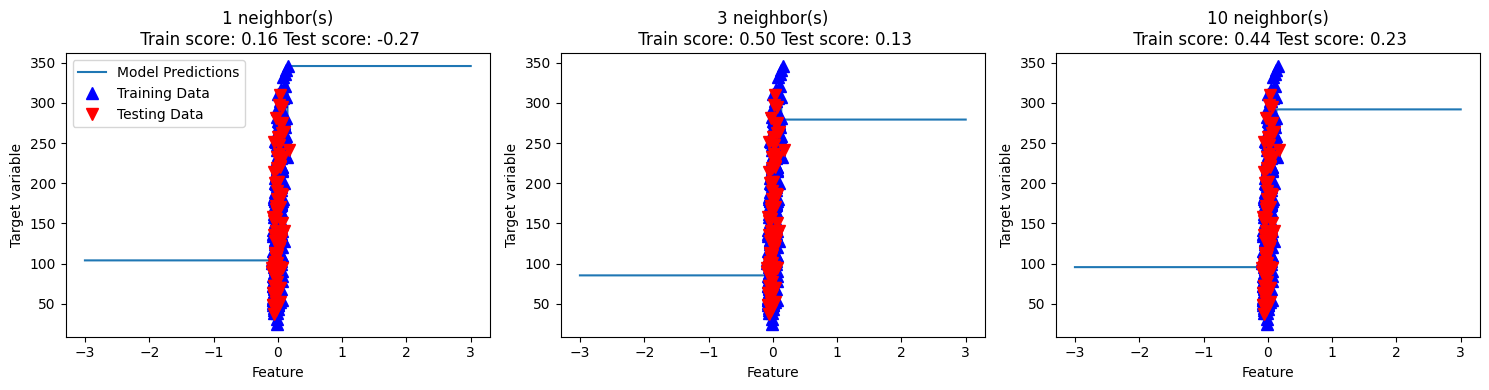

In [124]:
from sklearn.neighbors import KNeighborsRegressor

X, y = diabetes.data, diabetes.target

X = X[:, np.newaxis, 2]  
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 10], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c='blue', markersize=8, label='Training data')
    ax.plot(X_test, y_test, 'v', c='red', markersize=8, label='Testing data')
    ax.set_title("{} neighbor(s)\n Train score: {:.2f} Test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target variable")

axes[0].legend(["Model Predictions", "Training Data", "Testing Data"], loc="best")
plt.tight_layout()
plt.show()

In [128]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [129]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[975.27698313]
lr.intercept_:152.07653296894014


In [130]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.35
Correctness on the test set: 0.32


In [132]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [133]:
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test,y_test)))

Correctness on the train set: 0.23
Correctness on the test set: 0.23


In [134]:
print("Correctness on the train set: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge01.score(X_test,y_test)))

Correctness on the train set: 0.34
Correctness on the test set: 0.32


In [135]:
print("Correctness on the train set: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge10.score(X_test,y_test)))

Correctness on the train set: 0.05
Correctness on the test set: 0.04


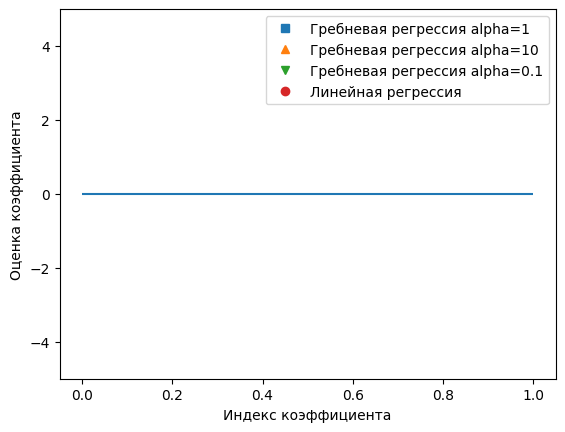

In [137]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-5, 5)
plt.legend()
plt.show()

In [149]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)


In [150]:
print("Correctness on the train set: {:.2f}".format(lasso.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))

Correctness on the train set: 0.28
Correctness on the test set: 0.27
Number of the used features: 1


In [151]:
print("Correctness on the train set: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso001.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso001.coef_ != 0)))

Correctness on the train set: 0.35
Correctness on the test set: 0.32
Number of the used features: 1


In [152]:
print("Correctness on the train set: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso00001.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso00001.coef_ != 0)))

Correctness on the train set: 0.35
Correctness on the test set: 0.32
Number of the used features: 1


Text(0, 0.5, 'Оценка коэффициента')

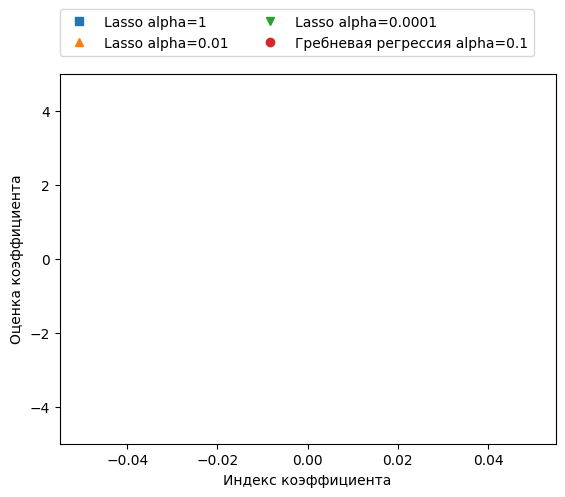

In [154]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [155]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Correctness on the train set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg.score(X_test,y_test)))  
print("Correctness on the train set: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg100.score(X_test,y_test)))   
print("Correctness on the train set: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg001.score(X_test,y_test))) 

Correctness on the train set: 0.015
Correctness on the test set: 0.009
Correctness on the train set: 0.024
Correctness on the test set: 0.009
Correctness on the train set: 0.015
Correctness on the test set: 0.009


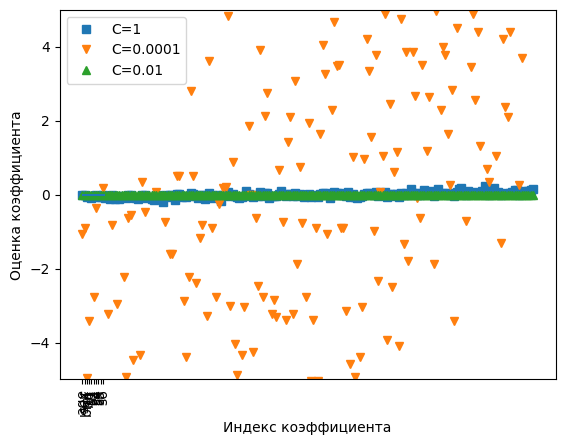

In [157]:
plt.plot(logreg.coef_, 's', label="C=1")
plt.plot(logreg100.coef_, 'v', label="C=0.0001")
plt.plot(logreg001.coef_, '^', label="C=0.01")
plt.xticks(range(diabetes.data.shape[1]),diabetes.feature_names, rotation=90)
plt.hlines(0,0,diabetes.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()